In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
#sns.set()
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

**P-значение на примере с пиццами!!!**

In [ ]:
norm_rv = stats.norm(loc=30, scale=5)
samples = np.trunc(norm_rv.rvs(365))
samples[:30]

array([32., 29., 33., 37., 28., 28., 37., 33., 27., 32., 27., 27., 31.,
       20., 21., 27., 24., 31., 25., 22., 37., 28., 30., 22., 27., 30.,
       24., 31., 26., 28.])

In [ ]:
#среднее время доставки пиццы и его среднеквадратическое отклонени
samples.mean(), samples.std()

(29.52054794520548, 4.77410133275075)

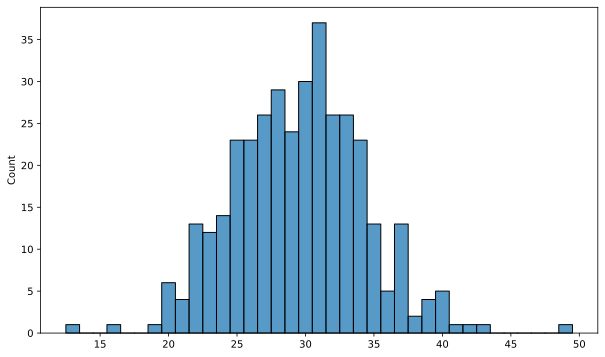

In [ ]:
sns.histplot(x=samples, discrete=True);

**Cмысл центральной предельной теоремы: распределение суммы случайных переменных стремится к нормальному распределению при увеличении количества слагаемых в этой сумме.**

**Z-значения**

Очевидно он, как и некоторые люди, думает, что 30\pm5 минут означает, что доставка может длиться 27, 31, даже 35 минут, но никак не 23 или 38 минут. Однако, мы заказывали пиццу 365 раз и знаем, что доставка может длиться и 20 и даже 45 минут. А фраза 30\pm5 минут, означает лишь то, что какая-то значительная часть доставок бодет занимать от 25 до 35 минут. Зная параметры распределения, мы даже можем смоделировать несколько тысяч доставок и прикинуть величину этой части:

In [ ]:
N = 5000
t_data = norm_rv.rvs(N)
t_data[(25 < t_data) & (t_data < 35)].size/N

0.6874

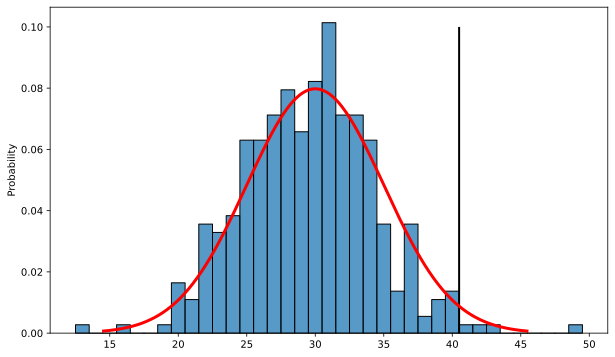

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(norm_rv.ppf(0.001), norm_rv.ppf(0.999), 200)
ax.vlines(40.5, 0, 0.1, color='k', lw=2)
sns.lineplot(x=x, y=norm_rv.pdf(x), color='r', lw=3)
sns.histplot(x=samples, stat='probability', discrete=True);

Высота прямоугольников показывает не количество вхождений каждого значения в выборку, а вероятность их появления в выборке. Красной линией мы нарисовали функцию распределения плотности вероятности значений времени доставки.

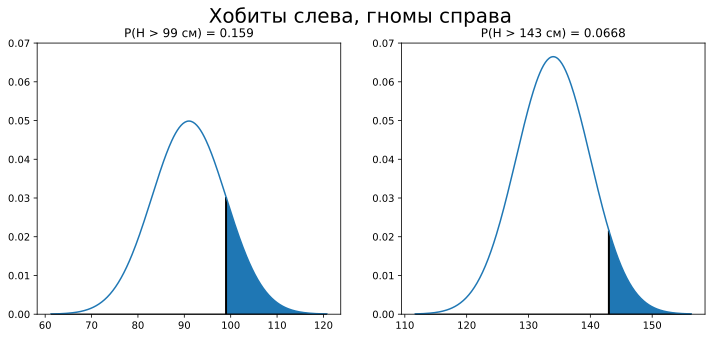

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))

nrv_hobbit = stats.norm(91, 8)
nrv_gnome = stats.norm(134, 6)

for i, (func, h) in enumerate(zip((nrv_hobbit, nrv_gnome), (99, 143))):
    x = np.linspace(func.ppf(0.0001), func.ppf(0.9999), 300)
    ax[i].plot(x, func.pdf(x))
    ax[i].fill_between(x[x>h], func.pdf(x[x>h]), np.zeros(len(x[x>h])))
    p = 1 - func.cdf(h)
    ax[i].set_title('P(H > {} см) = {:.3}'.format(h, p))
    ax[i].hlines(0, func.ppf(0.0001), func.ppf(0.9999), lw=1, color='k')
    ax[i].vlines(h, 0, func.pdf(h), color='k', lw=2)
    ax[i].set_ylim(0, 0.07)
fig.suptitle('Хобиты слева, гномы справа', fontsize = 20);

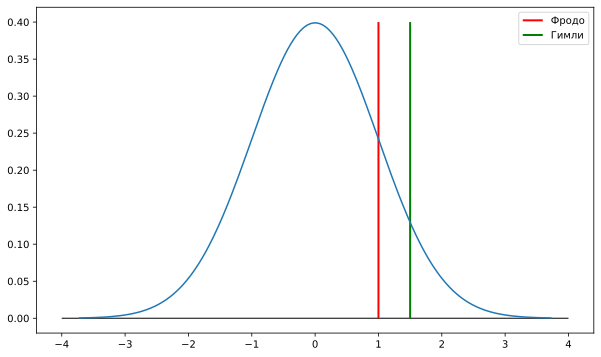

In [ ]:
fig, ax = plt.subplots()
N_rv = stats.norm()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, -4, 4, lw=1, color='k')
ax.vlines(1, 0, 0.4, color='r', lw=2, label='Фродо')
ax.vlines(1.5, 0, 0.4, color='g', lw=2, label='Гимли')
ax.legend();

Z-статистика, как и Z-значение является стандартизированной величиной и так же измеряется в сигмах, что позволяет использовать стандартное нормальное распределение для подсчета вероятностей

 Z-статистика зависит как от среднего выборки - \bar{x}, так и от величины выборки - n.

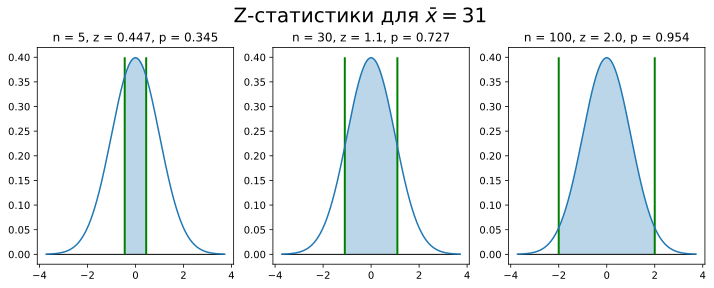

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))

for i, n in enumerate([5, 30, 100]):
    x, mu, sigma = 31, 30, 5
    z = abs((x - mu)/(sigma/n**0.5))

    N_rv = stats.norm()
    x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
    ax[i].plot(x, N_rv.pdf(x))
    ax[i].hlines(0, x.min(), x.max(), lw=1, color='k')
    ax[i].vlines([-z, z], 0, 0.4, color='g', lw=2)
    x_z = x[(x>-z) & (x<z)] # & (x<z)
    ax[i].fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

    p = N_rv.cdf(z) - N_rv.cdf(-z)
    ax[i].set_title('n = {}, z = {:.3}, p = {:.3}'.format(n, z, p));
fig.suptitle(r'Z-статистики для $\bar{x} = 31$', fontsize = 20, y=1.02);

Чем меньше p-value тем меньше вероятность того, что среднее выборки получено случайно. При этом p-value напрямую связано с двусторонними гипотезами, т.е. гипотезами о попадании величины в заданный интервал. Если мы получили какие-то результаты, но p-value оказалось довольно большим, то вряд ли эти результаты могут считаться значимыми. 

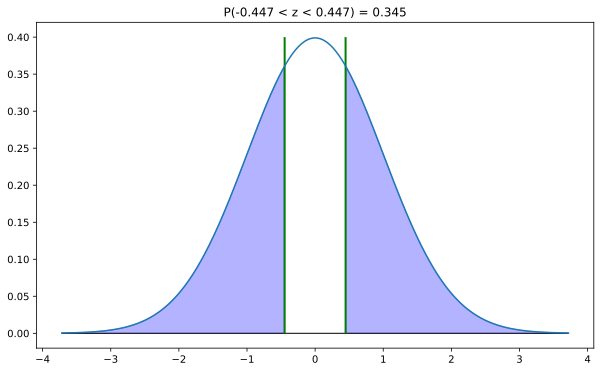

In [ ]:
x, n, mu, sigma = 31, 5, 30, 5
z = abs((x - mu)/(sigma/n**0.5))
N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_le_z, x_ge_z = x[x<-z], x[x>z]
ax.fill_between(x_le_z, N_rv.pdf(x_le_z), np.zeros(len(x_le_z)), alpha=0.3, color='b')
ax.fill_between(x_ge_z, N_rv.pdf(x_ge_z), np.zeros(len(x_ge_z)), alpha=0.3, color='b')

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p));

Z-статистика основана на центральной предельной теореме: вне зависимости от того как распределена генеральная совокупность, распределение средних значений выборок будет стремиться к нормальному распределению, тем сильнее, чем больше размер выборок.
Это кажется не очень правдоподобным, но давайте взглянем. Сгенерируем 1000 значений из равномерного, экспоненциального и Лапласова распределения, а затем, последовательно, для каждого распределения построим kde-графики распределений среднего значения выборок разного размера